In [75]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris
from pandas import Series, DataFrame

%matplotlib inline

### Movie info

In [2]:
# Read in the data as movie_info
# Use parse_dates and pass column name to read it as a datetime
movie_info = pd.read_csv('Data/rt.movie_info.tsv', encoding='latin-1', sep='\t', 
                        parse_dates=['theater_date', 'dvd_date'])
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,NaN,200 minutes,NaN


In [3]:
movie_info.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [4]:
# Info on the dataframe
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   datetime64[ns]
 8   currency      340 non-null    object        
 9   box_office    340 non-null    object        
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(9)
memory usage: 146.4+ KB


### Cleaning the data

In [5]:
#checking how many null values there are in each column
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

To clean my columns from the null values, I will be replacing the values in some of the columns with 'Missing" so that it's all consistent across the columns

In [6]:
#Fill the missing values in synposis, genre, director, writer, currency, studio with 'Missing'
movie_info['synopsis'].fillna('Missing', inplace=True)
movie_info['genre'].fillna('Missing', inplace=True)
movie_info['director'].fillna('Missing', inplace=True)
movie_info['writer'].fillna('Missing', inplace=True)
movie_info['currency'].fillna('Missing', inplace=True)
movie_info['studio'].fillna('Missing', inplace=True)


In [7]:
#Fill theater_date and dvd_date missing values with a generic date "1800-01-01" to keep same format
movie_info['theater_date'].fillna('1800-01-01', inplace=True)
movie_info['dvd_date'].fillna('1800-01-01', inplace=True)

In [8]:
#Fill box_office missing valus with 0
movie_info['box_office'].fillna(0, inplace=True)

### Step 1: let's look at the different variables within this data frame to see what factors contribute to successful movies


### We will first look at Runtime across movies, what's the most used runtime, what's the average?

In [9]:
movie_info['runtime'].value_counts()

90 minutes     72
95 minutes     66
100 minutes    51
93 minutes     47
96 minutes     43
               ..
54 minutes      1
313 minutes     1
186 minutes     1
192 minutes     1
63 minutes      1
Name: runtime, Length: 142, dtype: int64

In [10]:
movie_info['runtime']

0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object

We will change the type of runtime column into actual numbers so we can work on it

In [11]:
movie_info['runtime'] = movie_info['runtime'].str.replace('minutes',"")
movie_info['runtime'] = pd.to_numeric(movie_info['runtime'])

In [12]:
#to confirm that the type has changed
movie_info['runtime'].dtype

dtype('float64')

In [13]:
lowest_five_runtime = movie_info.sort_values('runtime', ascending=True)
lowest_five_runtime.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1358,1753,Carmel Myers' co-star in this amusing farce is...,NR,Comedy,Paul Powell,Missing,1800-01-01,1800-01-01,Missing,0,5.0,Missing
540,707,James Pierce is one of the lesser-known film T...,NR,Action and Adventure,Missing,Missing,1800-01-01,1800-01-01,Missing,0,6.0,Missing
273,361,Missing,NR,Drama|Special Interest,Roberto Sanchez Santos,Missing,1800-01-01,1800-01-01,Missing,0,7.0,Missing
950,1229,A short fashion film.,NR,Documentary,Missing,Missing,1800-01-01,1800-01-01,Missing,0,10.0,Missing
983,1275,"Desperately seeking to save his marriage, Bren...",NR,Drama,Jen McGowan,Colin Pink|Jen McGowan,1800-01-01,1800-01-01,Missing,0,11.0,Missing


In [14]:
highest_five_runtime = movie_info.sort_values('runtime', ascending=False)
highest_five_runtime.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
639,823,Directed by Marco Tullio Giordana and La Megli...,R,Art House and International|Drama|Romance,Marco Tullio Giordana,Stefano Rulli|Sandro Petraglia,2003-06-22 00:00:00,2006-02-07 00:00:00,Missing,0,358.0,Miramax Films
508,666,"After twenty-five years, a trio of old high sc...",NR,Drama|Mystery and Suspense,Paul Wendkos,Missing,1800-01-01,1800-01-01,Missing,0,313.0,Missing
1111,1434,When a pay cut sends Australian dock workers o...,NR,Drama|Romance,Chris Thomson,Missing,1800-01-01,1800-01-01,Missing,0,294.0,Missing
1490,1918,A collection of 15 chapters from Tarzan and th...,NR,Action and Adventure|Classics|Documentary,Henry MacRae|Harry McRae,William Lord Wright|Ian McCloskey Heath,1929-10-01 00:00:00,2006-10-24 00:00:00,Missing,0,290.0,Missing
1029,1332,Based on the classic Nathaniel Hawthorne novel...,NR,Drama|Television,Rick Hauser,Missing,1800-01-01,1800-01-01,Missing,0,240.0,Missing


In [15]:
print(movie_info['runtime'].min())
print(movie_info['runtime'].max())

5.0
358.0


In [16]:
movie_info['runtime'].describe()

count    1530.000000
mean      103.967974
std        24.642392
min         5.000000
25%        91.000000
50%       100.000000
75%       114.000000
max       358.000000
Name: runtime, dtype: float64

In [49]:
movie_info['runtime'].mode

<bound method Series.mode of 0       104.0
1       108.0
2       116.0
3       128.0
4       200.0
        ...  
1555    106.0
1556     88.0
1557    111.0
1558    101.0
1559     94.0
Name: runtime, Length: 1530, dtype: float64>

Mean Value for Runtime column: 103.96797385620916
Median Value for Runtime column: 100.0


C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


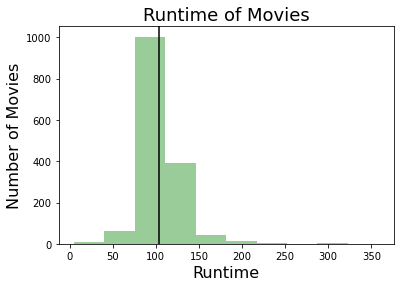

In [17]:
runtime_mean = movie_info['runtime'].mean()
runtime_median = movie_info['runtime'].median()

sns.distplot(movie_info['runtime'],kde=False, color='green', bins=10)
plt.axvline(x = movie_info['runtime'].mean(), color = 'black')
plt.title('Runtime of Movies', fontsize=18)
plt.xlabel('Runtime', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16);

# # fig, ax = plt.subplots()

# sns.histplot(data=movie_info, x=['runtime']
# # plt.axvline(x = movie_info['runtime'].mean(), color = 'black')
# # ax.set_title("Runtime of Movies")
# # ax.set_xlabel("Runtime")
# # ax.set_ylabel("Number of Movies")

print("Mean Value for Runtime column: {}".format(runtime_mean))
print("Median Value for Runtime column: {}".format(runtime_median))

In [18]:
#previous method i used before seaborn
# runtime_mean = movie_info['runtime'].mean()
# runtime_median = movie_info['runtime'].median()

# fig, ax = plt.subplots()

# ax.hist(movie_info['runtime'])
# plt.axvline(x = movie_info['runtime'].mean(), color = 'black')
# ax.set_title("Runtime of Movies")
# ax.set_xlabel("Runtime")
# ax.set_ylabel("Number of Movies")

# print("Mean Value for Runtime column: {}".format(runtime_mean))
# print("Median Value for Runtime column: {}".format(runtime_median))

From the visualization above, we can see the data has a slightly positive skew.

**Dropping rows that contain missing values:** runtime column contains 30 null values in this case we will simply drop any rows that contain them. The number dropped does not constitute a significant portion of our dataset, so dropping the values is an acceptable loss

In [19]:
movie_info = movie_info.dropna(subset=['runtime'])
movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

### let's check the rating and see what's the most popular rating

In [20]:
movie_info['rating'].value_counts()

R        519
NR       482
PG       239
PG-13    232
G         57
NC17       1
Name: rating, dtype: int64

In [21]:
movie_info['rating'].dtype

dtype('O')

In [22]:
# There are only 3 null values so let's drop them from the rating column 
movie_info = movie_info.dropna(subset=['rating'])
movie_info.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

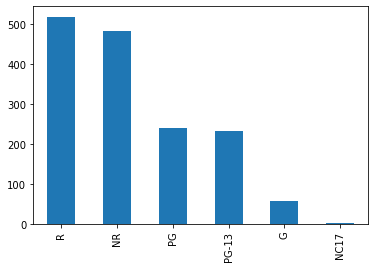

In [23]:
# now let's visualize it
movie_info['rating'].value_counts().plot(kind='bar');


C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


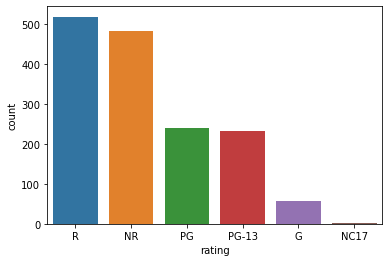

In [24]:
#I want to try seaborn visualization
sns.countplot(movie_info['rating']);

The graph shows us that the majority of movies are rated R

### Now let's examine the director column and see what we can extract from there
Is there a certain Director that is more successful than others that potentially could be hired to direct the movies?

In [25]:
movie_info['director'].value_counts()

Missing               185
Steven Spielberg       10
Clint Eastwood          8
Barry Levinson          4
Woody Allen             4
                     ... 
Will Canon              1
Danny Leiner            1
Daston Kalili           1
Richard Quine           1
Nicholas Jasenovec      1
Name: director, Length: 1116, dtype: int64

Inspired by Leo's work since he had already worked on director column

In [26]:
#I will use the same thing Leo used to split genres by Director
s = movie_info['genre'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
# del movie_info['genre'] (I don't want to delete from my original dataframe)
movie_split_genres = movie_info.join(s)

In [27]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,"600,000",108.0,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,Missing,0,116.0,Missing
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,Missing,0,128.0,Missing
4,7,Missing,NR,Drama|Romance,Rodney Bennett,Giles Cooper,1800-01-01,1800-01-01,Missing,0,200.0,Missing


In [28]:
movie_split_genres = movie_split_genres.drop('genre', axis=1)

In [29]:
movie_split_genres.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genres
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,"600,000",108.0,Entertainment One,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,"600,000",108.0,Entertainment One,Science Fiction and Fantasy


In [30]:
#continuing with Leo's work

# using the groupby function on the director column

# first i will split the objects 
# then apply a function
# then combine those results 

# made this into a variable so that i dont have to write the same code
movie_dir = movie_split_genres.groupby(['director'])

# what i get back is a dataframe groupby object

In [31]:
# this returns a dataframe with the director info
# this is like running a filter on the original dataframe
movie_dir.get_group('William Friedkin')

,id,synopsis,rating,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genres
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,Missing,0,104.0,Missing,Drama
13,20,Rachel (Britt Ekland) is an Amish girl who rej...,PG-13,William Friedkin,Sidney Michaels|Arnold Schulman|Norman Lear,1968-12-22 00:00:00,2008-05-20 00:00:00,Missing,0,97.0,Missing,Classics
13,20,Rachel (Britt Ekland) is an Amish girl who rej...,PG-13,William Friedkin,Sidney Michaels|Arnold Schulman|Norman Lear,1968-12-22 00:00:00,2008-05-20 00:00:00,Missing,0,97.0,Missing,Comedy
13,20,Rachel (Britt Ekland) is an Amish girl who rej...,PG-13,William Friedkin,Sidney Michaels|Arnold Schulman|Norman Lear,1968-12-22 00:00:00,2008-05-20 00:00:00,Missing,0,97.0,Missing,Drama
514,674,When 22 year-old drug dealer Chris (Hirsch) ha...,R,William Friedkin,Tracy Letts,2012-07-27 00:00:00,2012-12-21 00:00:00,$,"1,800,000",102.0,Independent Pictures,Comedy
514,674,When 22 year-old drug dealer Chris (Hirsch) ha...,R,William Friedkin,Tracy Letts,2012-07-27 00:00:00,2012-12-21 00:00:00,$,"1,800,000",102.0,Independent Pictures,Mystery and Suspense
1059,1368,"In this drama, two U.S. Marines who stood side...",R,William Friedkin,Stephen Gaghan,2000-04-07 00:00:00,2000-10-10 00:00:00,Missing,0,127.0,Paramount Pictures,Action and Adventure
1059,1368,"In this drama, two U.S. Marines who stood side...",R,William Friedkin,Stephen Gaghan,2000-04-07 00:00:00,2000-10-10 00:00:00,Missing,0,127.0,Paramount Pictures,Drama


In [32]:
#okay so from here I will continue what I wanted to do
movie_dir['director'].value_counts()

director                      director                    
Abel Ferrara                  Abel Ferrara                    5
Adam Ravetch|Sarah Robertson  Adam Ravetch|Sarah Robertson    2
Adam Shankman                 Adam Shankman                   2
Adam Silver|Ben Hayflick      Adam Silver|Ben Hayflick        2
Aditya Chopra                 Aditya Chopra                   5
                                                             ..
Youssef Delara                Youssef Delara                  2
Yves Simoneau                 Yves Simoneau                   2
Zak Penn                      Zak Penn                        1
Zeresenay Berhane Mehari      Zeresenay Berhane Mehari        2
Zhang Jun Zhao                Zhang Jun Zhao                  1
Name: director, Length: 1116, dtype: int64

In [50]:
movie_split_genres['director'].value_counts()

Missing               424
Steven Spielberg       19
Clint Eastwood         16
Alfred Hitchcock       15
Charles Walters        12
                     ... 
Jesse Dylan             1
James Hogan             1
Ken Shapiro             1
Dave McCary             1
Nicholas Jasenovec      1
Name: director, Length: 1116, dtype: int64

In [52]:
movie_split_genres.sort_values('director', ascending=False)

,id,synopsis,rating,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genres
1525,1961,"It is 1939, and the Red Army is deeply engaged...",NR,Zhang Jun Zhao,Missing,1800-01-01,1800-01-01,Missing,0,90.0,Missing,Drama
1131,1459,From executive producer Angelina Jolie Pitt co...,NR,Zeresenay Berhane Mehari,Zeresenay Berhane Mehari,1800-01-01,1800-01-01,Missing,0,96.0,Truth Aid,Drama
1131,1459,From executive producer Angelina Jolie Pitt co...,NR,Zeresenay Berhane Mehari,Zeresenay Berhane Mehari,1800-01-01,1800-01-01,Missing,0,96.0,Truth Aid,Documentary
786,1016,Incident at Loch Ness director Zak Penn takes ...,R,Zak Penn,Matt Bierman|Zak Penn,2008-01-11 00:00:00,2008-06-10 00:00:00,Missing,0,104.0,Anchor Bay Entertainment,Comedy
532,694,"In this suspenseful horror movie, a mother des...",R,Yves Simoneau,Barry Schneider|Richard Hawley,1993-01-01 00:00:00,2001-05-15 00:00:00,Missing,0,95.0,Missing,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
280,369,A former U.S. soldier travels to the Dominican...,R,Abel Ferrara,Alan Sharp|Elmore Leonard|James Borrelli,1989-04-01 00:00:00,2003-11-18 00:00:00,Missing,0,97.0,Missing,Mystery and Suspense
488,639,Abel Ferrara directed this erotic thriller ada...,R,Abel Ferrara,Abel Ferrara|Christ Zois,1999-10-01 00:00:00,1999-12-07 00:00:00,Missing,0,93.0,Missing,Drama
488,639,Abel Ferrara directed this erotic thriller ada...,R,Abel Ferrara,Abel Ferrara|Christ Zois,1999-10-01 00:00:00,1999-12-07 00:00:00,Missing,0,93.0,Missing,Mystery and Suspense
280,369,A former U.S. soldier travels to the Dominican...,R,Abel Ferrara,Alan Sharp|Elmore Leonard|James Borrelli,1989-04-01 00:00:00,2003-11-18 00:00:00,Missing,0,97.0,Missing,Action and Adventure


In [77]:
movie_split_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3529 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3529 non-null   int64  
 1   synopsis      3529 non-null   object 
 2   rating        3529 non-null   object 
 3   director      3529 non-null   object 
 4   writer        3529 non-null   object 
 5   theater_date  3529 non-null   object 
 6   dvd_date      3529 non-null   object 
 7   currency      3529 non-null   object 
 8   box_office    3529 non-null   object 
 9   runtime       3529 non-null   float64
 10  studio        3529 non-null   object 
 11  genres        3529 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 438.4+ KB


In [56]:
director_count = movie_split_genres['director'].value_counts()
director_count

Missing               424
Steven Spielberg       19
Clint Eastwood         16
Alfred Hitchcock       15
Charles Walters        12
                     ... 
Jesse Dylan             1
James Hogan             1
Ken Shapiro             1
Dave McCary             1
Nicholas Jasenovec      1
Name: director, Length: 1116, dtype: int64

In [65]:
director_count.nlargest(26)

Missing              424
Steven Spielberg      19
Clint Eastwood        16
Alfred Hitchcock      15
Charles Walters       12
Jim Jarmusch          12
Ridley Scott          11
William Friedkin      11
John Landis           10
Neil Jordan           10
Bruce Beresford       10
Yimou Zhang           10
Hark Tsui              9
David Swift            9
William Beaudine       9
Ang Lee                9
George Cukor           9
Ralph Nelson           8
Paul Verhoeven         8
Anatole Litvak         8
Joseph Ruben           8
Richard Linklater      8
Woody Allen            8
Boris Sagal            8
George Sidney          8
Henry Koster           8
Name: director, dtype: int64

In [69]:
director_count.sort_values(ascending=False)[:25]

Missing             424
Steven Spielberg     19
Clint Eastwood       16
Alfred Hitchcock     15
Charles Walters      12
Jim Jarmusch         12
Ridley Scott         11
William Friedkin     11
Neil Jordan          10
Bruce Beresford      10
Yimou Zhang          10
John Landis          10
Hark Tsui             9
David Swift           9
William Beaudine      9
Ang Lee               9
George Cukor          9
Boris Sagal           8
Lawrence Kasdan       8
Werner Herzog         8
Hong Sang-soo         8
Curtis Hanson         8
Henry Koster          8
George Sidney         8
Joseph Ruben          8
Name: director, dtype: int64

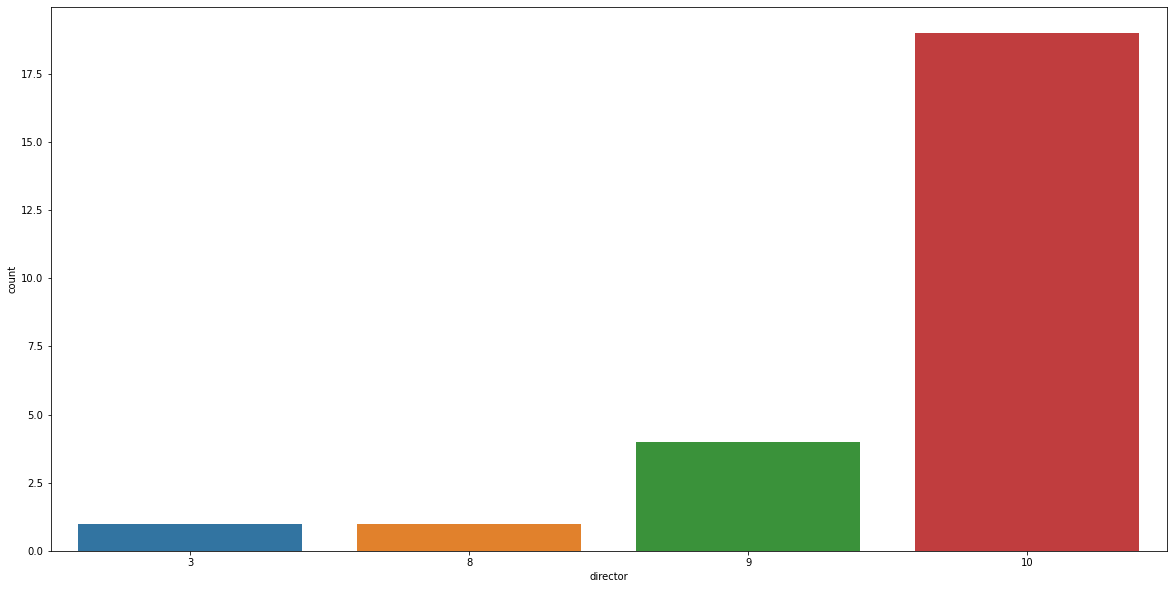

In [71]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1, x= director_count.sort_values(ascending=False)[:25], data=director_count)

In [94]:
top_director = movie_split_genres['director'].value_counts().sort_values(ascending=False).head(20)
top_director

Missing             424
Steven Spielberg     19
Clint Eastwood       16
Alfred Hitchcock     15
Charles Walters      12
Jim Jarmusch         12
Ridley Scott         11
William Friedkin     11
Neil Jordan          10
Bruce Beresford      10
Yimou Zhang          10
John Landis          10
Hark Tsui             9
David Swift           9
William Beaudine      9
Ang Lee               9
George Cukor          9
Boris Sagal           8
Lawrence Kasdan       8
Werner Herzog         8
Name: director, dtype: int64

In [95]:
# top_director[['director']].plot.barh(stacked=False, title= 'Top Directors', color=('DarkBlue'), figsize=(10,9));

In [97]:
top_director.value_counts()

9      5
10     4
8      3
12     2
11     2
19     1
16     1
15     1
424    1
Name: director, dtype: int64

In [100]:
top_director = top_director.drop(labels="Missing")

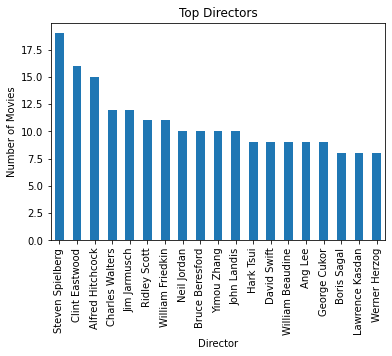

In [127]:
ax = top_director.plot.bar()
ax.set_title('Top Directors')
ax.set_xlabel('Director')
ax.set_ylabel('Number of Movies');              

### Relating everything together
Now that we've looked at different variables such as runtime, rating, top directors.
I will look at these variables in relation with profit and check whether any of them have a direct relationship with the amount of profit.

For this, I will be using Morgan's work on the budget table since I need the profit, and go from there.

I will get some of Morgan's work on the budget table

### Movies Budget table

In [128]:
budgets = pd.read_csv("data/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In this table we will assume that Revenue = 'worldwide_gross' & Cost = 'production_budget'

In [129]:
#will follow Morgan's data cleaning for this table
# removing $ and , from gross revenue
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(",","")
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace("$","")

# casting the values as integers
budgets['worldwide_gross'] = pd.to_numeric(budgets['worldwide_gross'])

In [130]:
# removing $ and , from production budget
budgets['production_budget'] = budgets['production_budget'].str.replace(",","")
budgets['production_budget'] = budgets['production_budget'].str.replace("$","")

# casting the values as integers
budgets['production_budget'] = pd.to_numeric(budgets['production_budget'])

In [131]:
# calculating total profit = revenue - cost
budgets['total_profit'] =  budgets['worldwide_gross'] - budgets['production_budget']

# confirmation
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747


From here on I will continue my work of comparing the total profit from the budgets table to the different factors in the movie_info table

### Merging budget and Movie_info databases

### Looking at tmdb data set
### tmdb Movies

In [35]:
tmdb = pd.read_csv('Data/tmdb.movies.csv', index_col=0, parse_dates=['release_date'])
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [36]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [37]:
# it looks like we don't have any null values, but just to confirm:
tmdb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [38]:
tmdb.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


### Look at Movies by popularity

Top Ten movies:

In [39]:
top_ten_movies_by_pop=tmdb.pivot_table(values='popularity',index="original_title").sort_values(ascending=False,by='popularity').head(10)
top_ten_movies_by_pop

,popularity
original_title,
Avengers: Infinity War,80.773
John Wick,78.123
Spider-Man: Into the Spider-Verse,60.534
The Hobbit: The Battle of the Five Armies,53.783
The Avengers,50.289
Guardians of the Galaxy,49.606
Blade Runner 2049,48.571
Fantastic Beasts: The Crimes of Grindelwald,48.508
Ralph Breaks the Internet,48.057


Bottom Ten movies

In [40]:
Bottom_ten_movies_by_pop=tmdb.pivot_table(values='popularity',index="original_title").sort_values(ascending=True,by='popularity').head(10)
Bottom_ten_movies_by_pop

,popularity
original_title,
"""BLESSED""",0.6
Lenny Cooke,0.6
Leolex,0.6
Leonard Cohen - Songs from the Road,0.6
Leonard in Slow Motion,0.6
Leones,0.6
Leopard,0.6
Les Profs,0.6
Lemonade + Ducktape Stuffs,0.6


### Looking into release date to see if there is a certain time of the year that has higher releases

To organize our data and make it simpler to visualize, I will go ahead and drop the columns that I won't be using for better visibility

In [41]:
# Drop the irrelevant columns
drop_columns = ['original_title','original_language','genre_ids']
tmdb.drop(drop_columns, axis=1, inplace=True)
tmdb.head()

,id,popularity,release_date,title,vote_average,vote_count
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,27.920,2010-07-16,Inception,8.3,22186


In [42]:
# getting only the year in release_date to make things simpler
# Coercion is the implicit conversion of an instance of one type to another
# during an operation which involves two arguments of the same type.
tmdb['year'] = pd.to_datetime(tmdb['release_date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [0] if x != np.nan else np.nan)
tmdb['month'] = pd.to_datetime(tmdb['release_date'], errors='coerce').apply(lambda x: str(x).split('-')
                                                                       [1] if x != np.nan else np.nan)
tmdb

,id,popularity,release_date,title,vote_average,vote_count,year,month
0,12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11
1,10191,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,03
2,10138,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,05
3,862,28.005,1995-11-22,Toy Story,7.9,10174,1995,11
4,27205,27.920,2010-07-16,Inception,8.3,22186,2010,07
...,...,...,...,...,...,...,...,...
26512,488143,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,10
26513,485975,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,05
26514,381231,0.600,2018-10-01,The Last One,0.0,1,2018,10
26515,366854,0.600,2018-06-22,Trailer Made,0.0,1,2018,06
